# Simulating the Chi-Squared Distribution

In this notebook, you will simulate the [chi-squared](https://en.wikipedia.org/wiki/Chi-squared_distribution) distribution $\chi^2_k$, where $k$ is an integer that is called the *degrees of freedom*. For this simulation, **do not** use `numpy.random.chisquare`; you will write you own function that generates $\chi^2_k$ random variates.

This distribution is defined in terms of the standard ($\mu=0.0$, $\sigma=1.0$) normal distribution:

$$Z \sim N(0.0,1.0) $$

$$ X \sim \sum_{i=1}^{k} Z_i^2 $$

## Imports

In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from ipywidgets import interact, fixed

## Simulating chi-squared

Write a function, `chi_squared`, that returns random numbers drawn from the $\chi^2_k$ distribution with degree of freedom $k$. In doing this, first draw random numbers from the standard normal distribution and then use those to generate the chi-squared random variates.

In [3]:
def chi_squared(k, size=1):
    chi = []
    ran = np.random.normal(0.0, 1.0, size)
    for index, ele in enumerate(ran):
        chi.append(ele**2 * k)
    chi = np.array(chi)
    return chi
chi_squared(2,10)

array([  0.84100956,   4.53777175,   3.48257209,  17.93198978,
         3.77237034,   0.05960861,   1.45251802,   3.05111131,
         2.47243331,   0.0959631 ])

To test your distribution, draw 100 chi-squared random numbers for $k=7$ and print the mean and variance of the data and compare that with the expected mean and variance for $k=7$:

In [4]:
chi_squared(7, 100).mean(), np.random.chisquare(7,100).mean()
    

(8.4743163392354734, 6.6984191226717318)

To visualize the $\chi^2_k$ distribution, write a function, `plot_chi_squared`, that makes an appropriately labeled `distplot` using Seaborn.

In [5]:
def plot_chi_squared(k):
    """Plot the chi-squared distribution as a distplot with 300 points."""
    X = chi_squared(k, 300)
    sns.distplot(X, bins=20, rug=True);
    print("mean =", X.mean(), "var =", X.var())
    plt.xlim(0, 20.0)
    plt.xlabel('chi-squared distribution')


mean = 3.26510782301 var = 18.9246446685


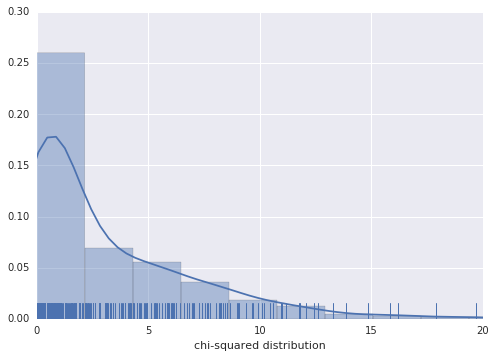

In [6]:
interact(plot_chi_squared, k=(0,7),_manuel=True);